<a href="https://colab.research.google.com/github/yashnaik270/Coronary-Artery-Disease/blob/main/CAD11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/CAD.csv")
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.shape

(303, 55)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,58.897690,10.392278,30.000000,51.00000,58.00000,66.000000,86.000000
Weight,303.0,73.831683,11.987358,48.000000,65.00000,74.00000,81.000000,120.000000
Length,303.0,164.716172,9.327661,140.000000,158.00000,165.00000,171.000000,188.000000
BMI,303.0,27.248339,4.098865,18.115413,24.51438,26.77551,29.411765,40.900658
DM,303.0,0.297030,0.457706,0.000000,0.00000,0.00000,1.000000,1.000000
HTN,303.0,0.590759,0.492507,0.000000,0.00000,1.00000,1.000000,1.000000
Current Smoker,303.0,0.207921,0.406491,0.000000,0.00000,0.00000,0.000000,1.000000
EX-Smoker,303.0,0.033003,0.178941,0.000000,0.00000,0.00000,0.000000,1.000000
FH,303.0,0.158416,0.365734,0.000000,0.00000,0.00000,0.000000,1.000000
BP,303.0,129.554455,18.938105,90.000000,120.00000,130.00000,140.000000,190.000000


In [ ]:
data['Cath'].value_counts()

,count
Cath,
Cad,216
Normal,87


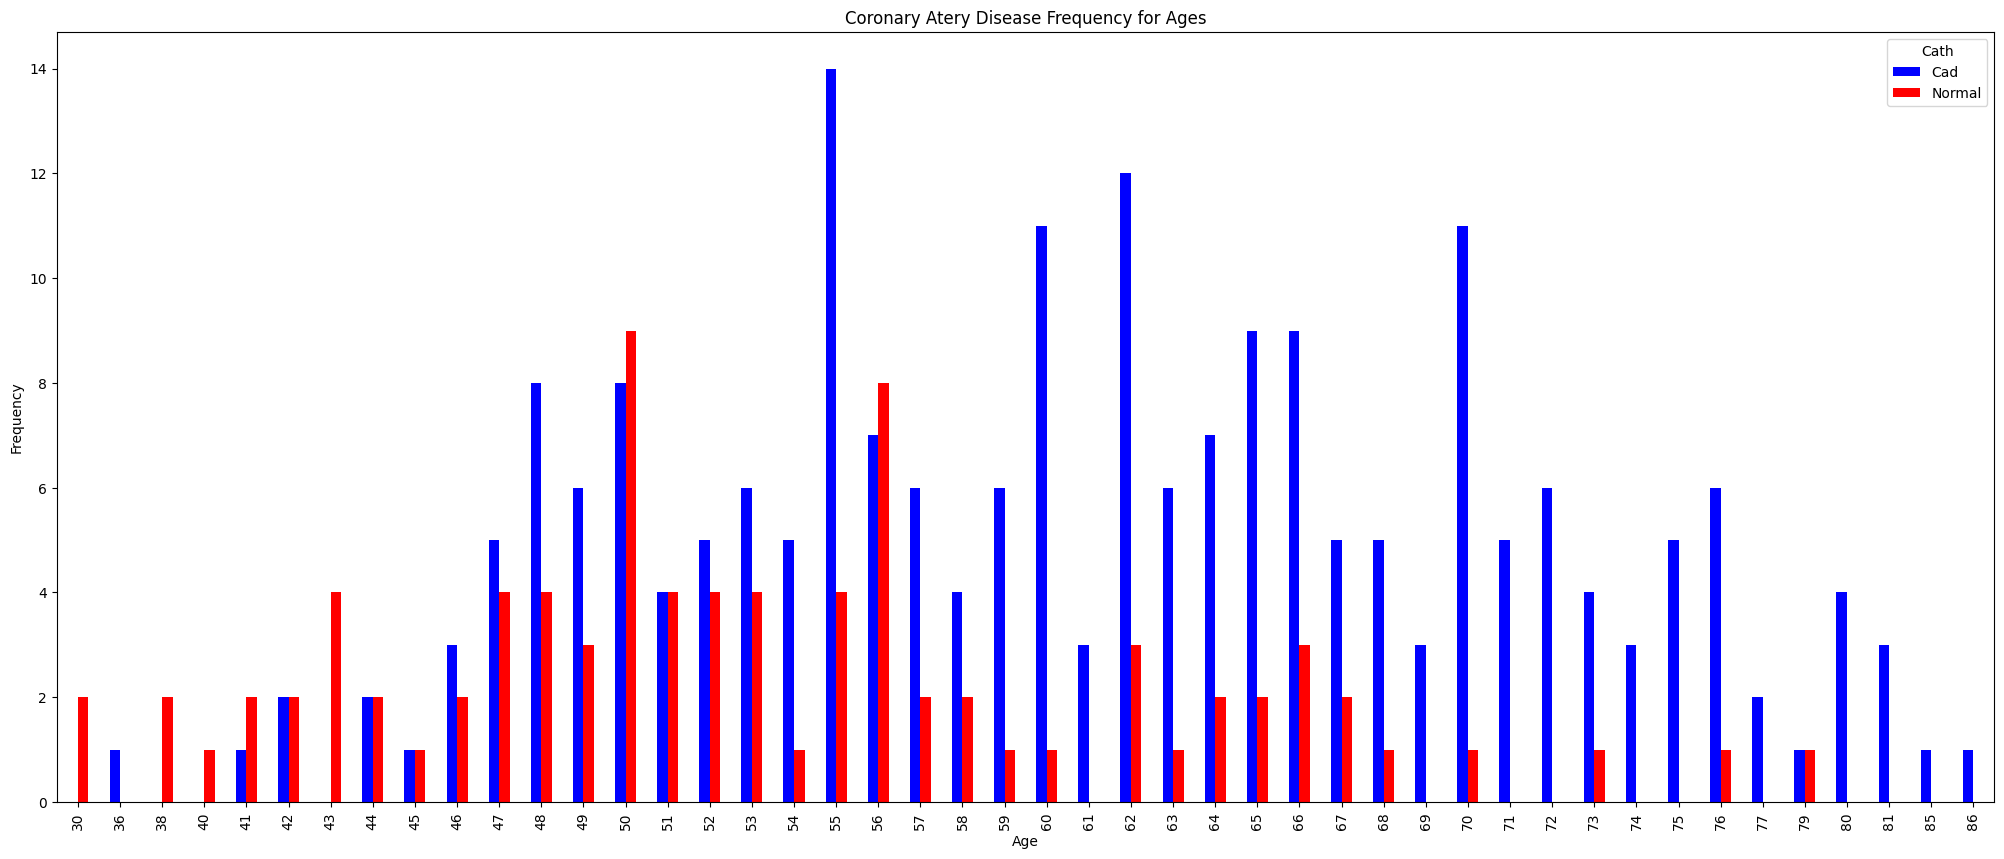

In [ ]:
##### AGE and CAD
pd.crosstab(data.Age,data.Cath).plot(kind="bar",figsize=(25,10),color=['blue','red' ])
plt.title('Coronary Atery Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


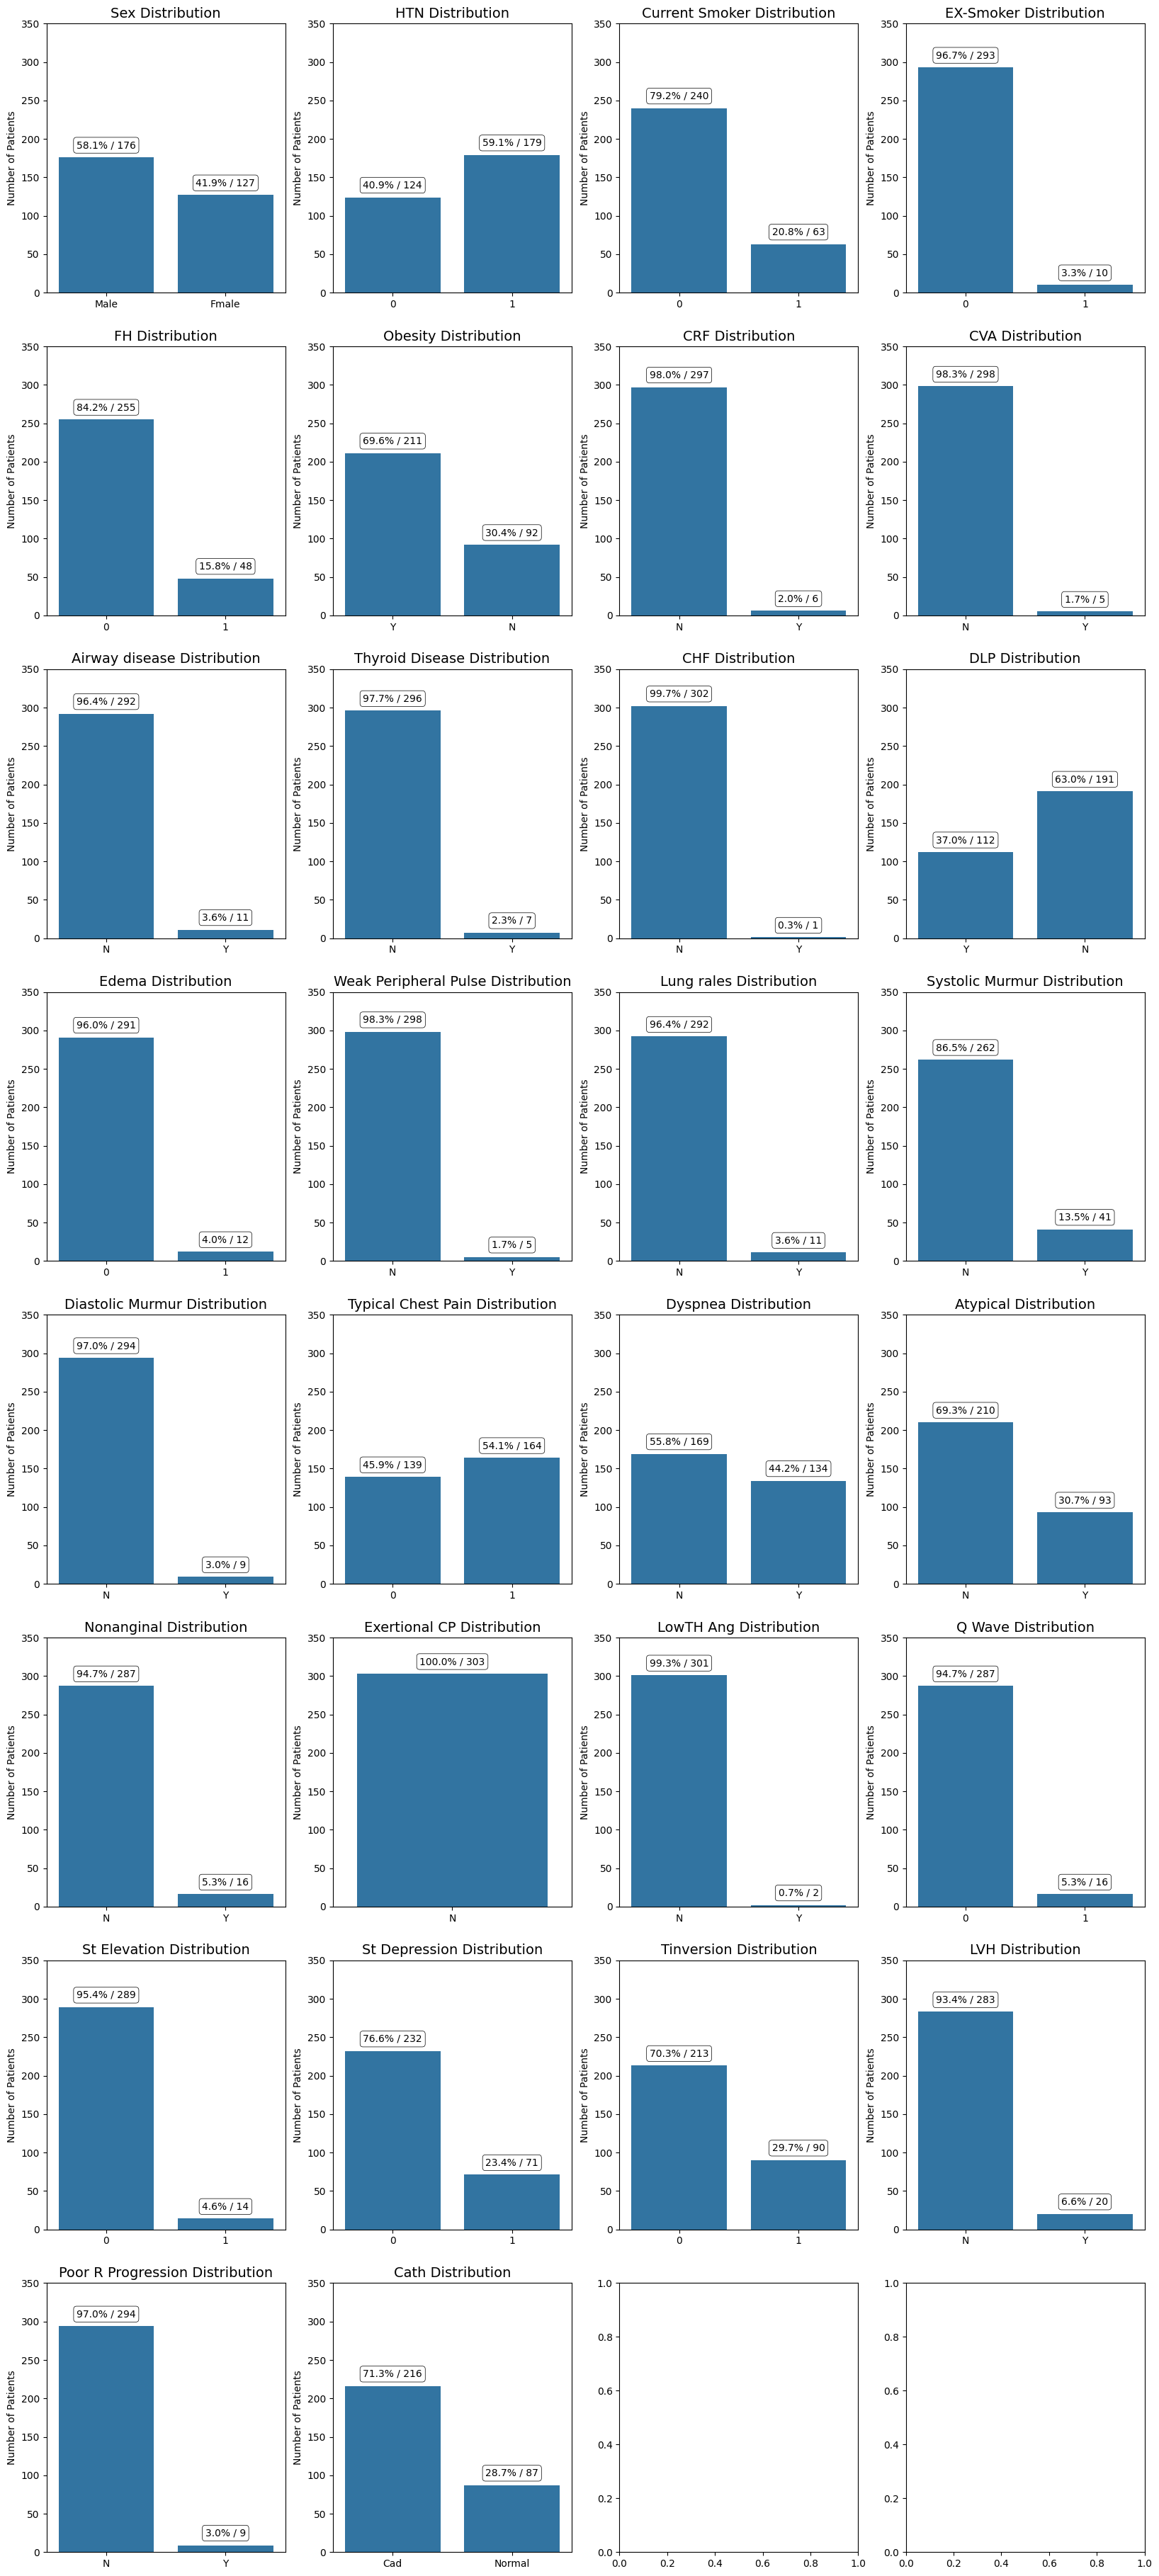

In [ ]:
n_rows, n_cols = 8, 4

# Categorical variables:
cat_cols = ['Sex', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Edema', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'LVH', 'Poor R Progression', 'Cath']

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,30))

for i, cat_col in enumerate(cat_cols):
    i, j = i//n_cols, i%n_cols
    rects = sns.countplot(x=cat_col, data=data, ax=ax[i,j])

    for rect in rects.patches:
        height = rect.get_height()
        ax[i,j].text(rect.get_x()+rect.get_width()/2., height+12, "{:1.1f}% / {:d}".format(height/len(data)*100, height.astype(int)), ha='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    ax[i,j].set_title(f'{cat_col} Distribution', fontsize=14)
    ax[i,j].set_xlabel("")
    ax[i,j].set_ylabel("Number of Patients")
    ax[i,j].set_ylim([0, 350])

fig.subplots_adjust(top=1.3)
fig.show()

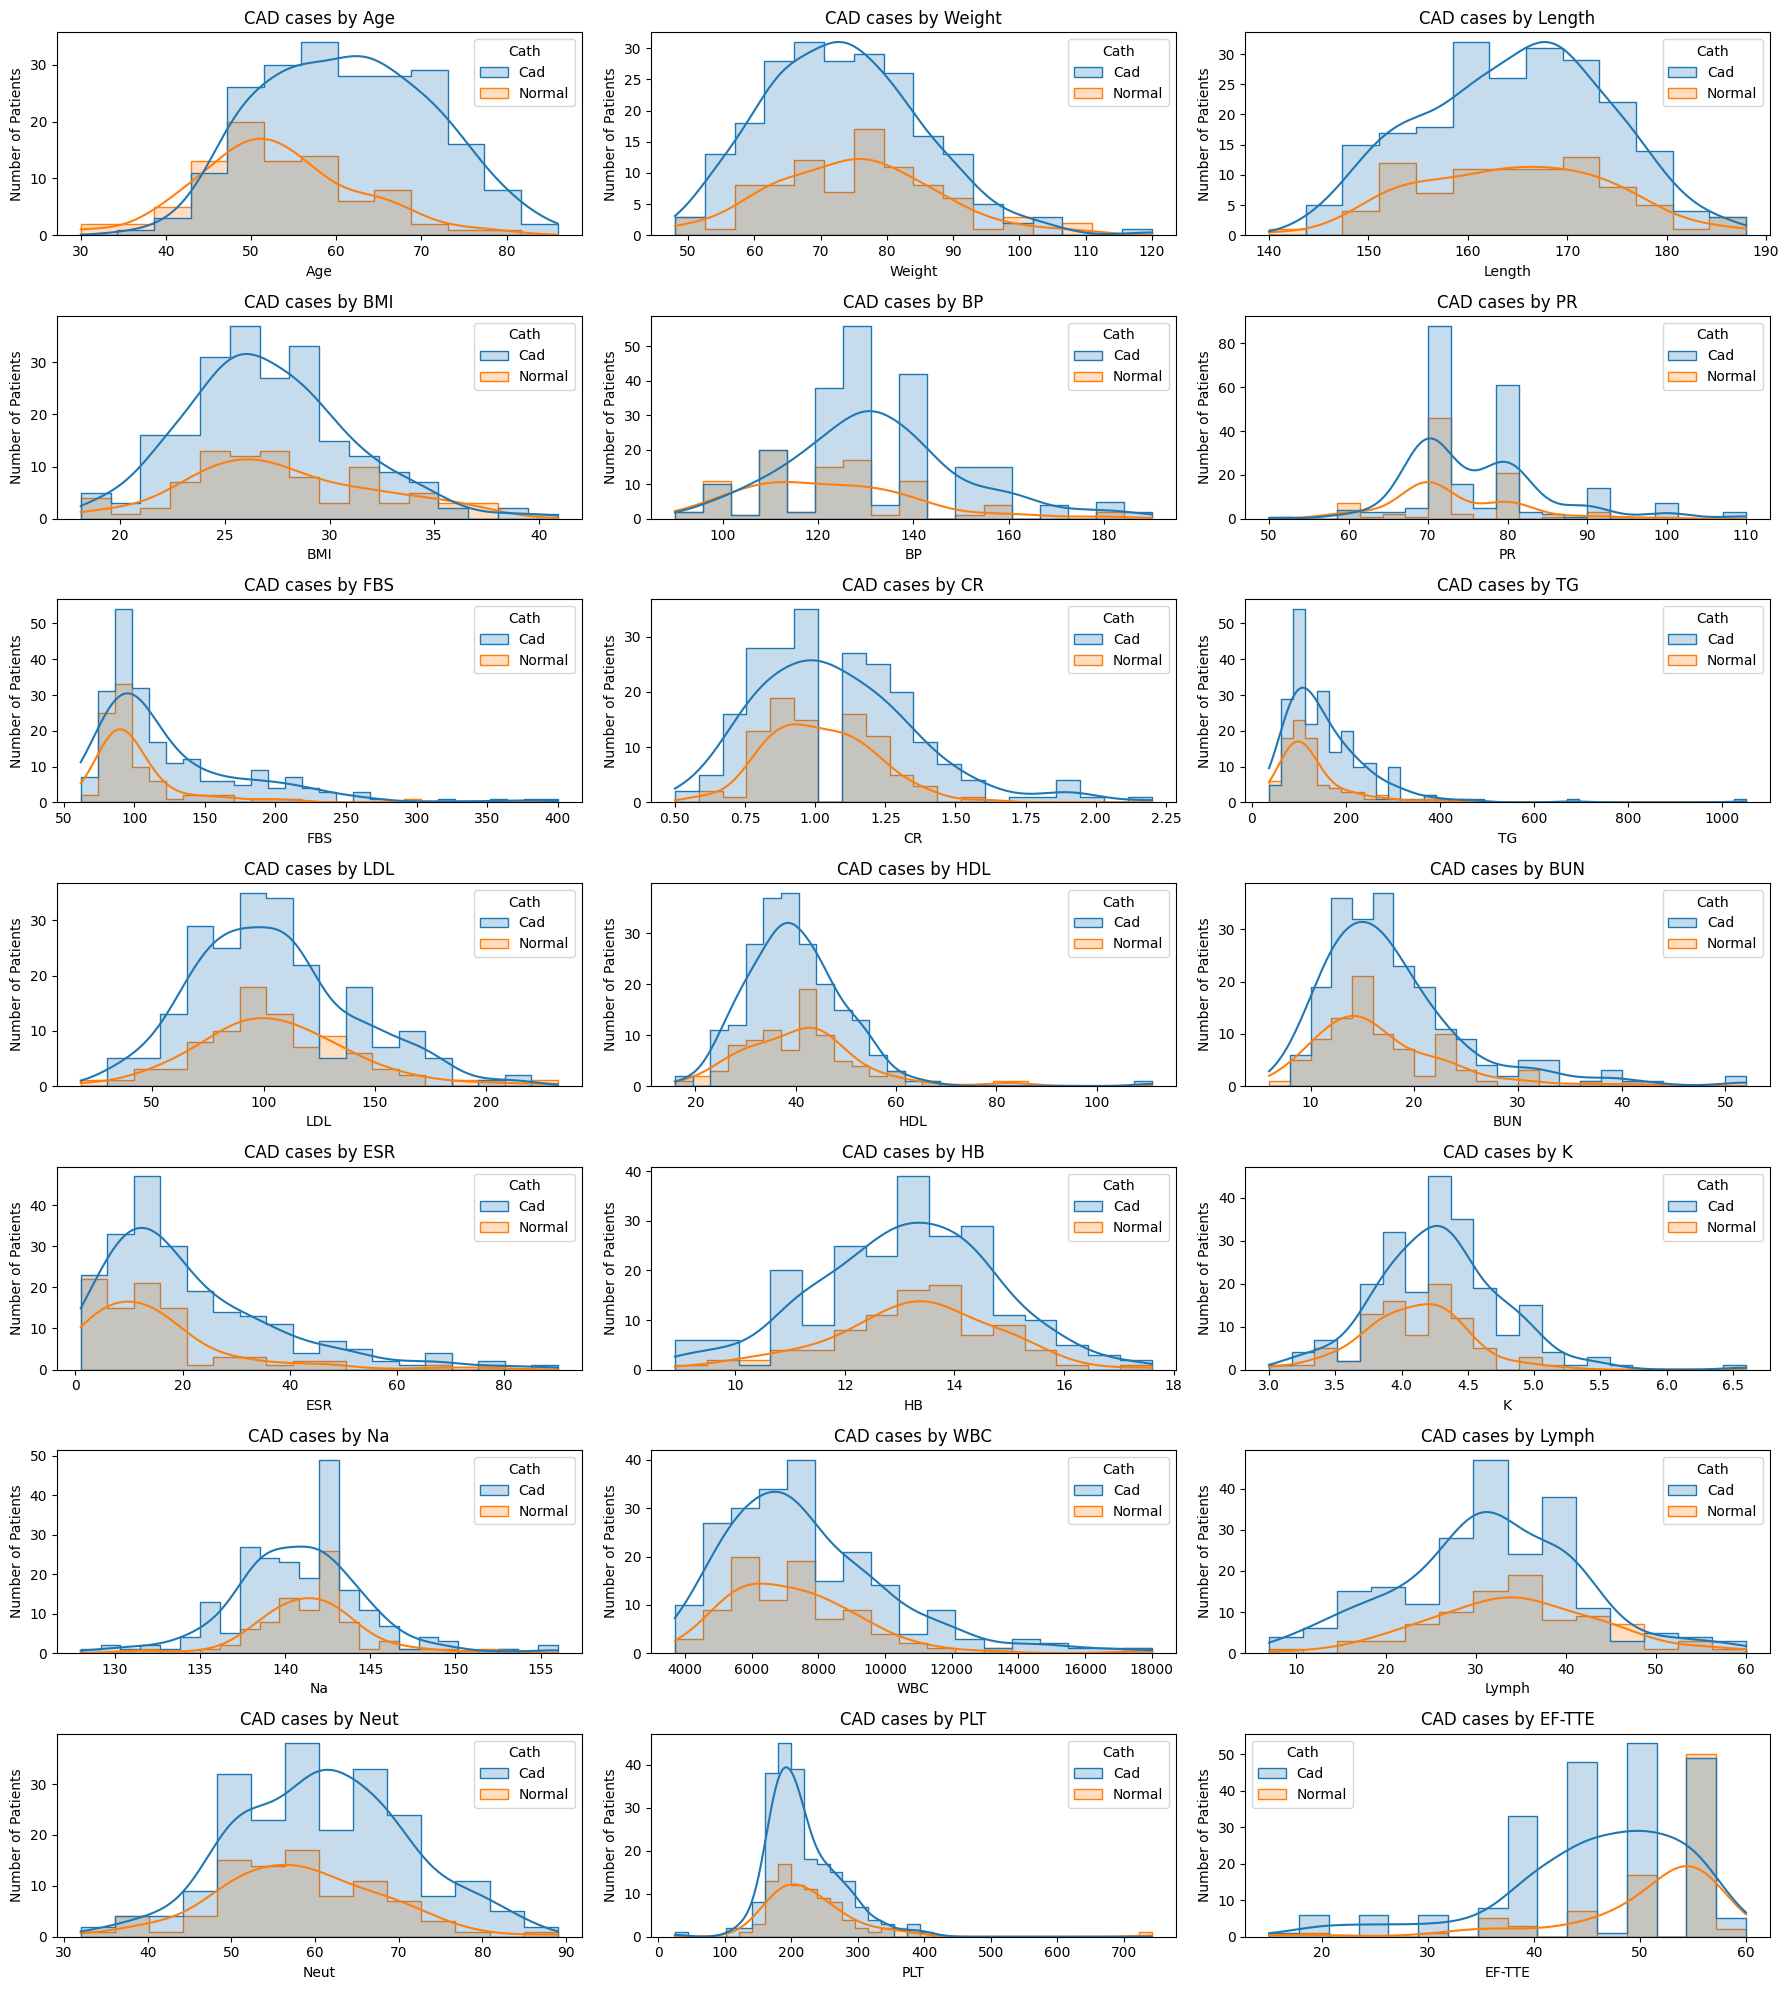

In [ ]:
num_cols = ['Age','Weight', 'Length','BMI', 'BP', 'PR', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

n_rows, n_cols = 7, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))

for i, col in enumerate(num_cols):
    i, j = i//n_cols, i%n_cols
    ax = axes[i][j]

    #sns.set_style("darkgrid")
    ax = sns.histplot(data=data, x=col, hue="Cath", kde=True, ax=ax, element="step")

    ax.set_xlabel(col)
    ax.set_ylabel("Number of Patients", fontsize="medium")
    #ax.set_ylim([0,100])
    ax.set_title(f'CAD cases by {col}', fontsize=12)


fig.tight_layout()
fig.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CAD.csv")

# data types of each feature
print("\nData Types:\n", df.dtypes)


# values of each Y and N
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")



## Now eliminating all different features that has no change for 290+ patients.


Data Types:
 Age                        int64
Weight                     int64
Length                     int64
Sex                       object
BMI                      float64
DM                         int64
HTN                        int64
Current Smoker             int64
EX-Smoker                  int64
FH                         int64
Obesity                   object
CRF                       object
CVA                       object
Airway disease            object
Thyroid Disease           object
CHF                       object
DLP                       object
BP                         int64
PR                         int64
Edema                      int64
Weak Peripheral Pulse     object
Lung rales                object
Systolic Murmur           object
Diastolic Murmur          object
Typical Chest Pain         int64
Dyspnea                   object
Function Class             int64
Atypical                  object
Nonanginal                object
Exertional CP             obj

### AUGMENTED DATA ANAYSIS

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/CAD_augmented.csv")
data1.head()

,Typical Chest Pain,Atypical,age,Region RWMA,HTN,Nonanginal,BP,DM,FBS,Tinversion,...,St Elevation,TG,Lymph,Dyspnea,HDL,CR,Poor R Progression,WBC,Sex,Cath
0,0,0,53,0,1,0,0,0,0,1,...,0,2,1,0,2,1,0,1,1,1
1,1,0,67,4,1,0,3,0,0,1,...,0,2,1,0,2,1,0,1,0,1
2,1,0,54,2,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,1,1
3,0,0,66,0,1,1,0,0,0,0,...,0,0,0,1,2,1,0,2,0,0
4,0,0,50,0,1,0,0,0,1,0,...,0,1,2,1,1,1,0,1,0,0


In [ ]:
data1.shape
data1['Cath'].value_counts()

,count
Cath,
1,5000
0,5000


In [ ]:
# data types of each feature
print("\nData Types:\n", data1.dtypes)


# values of each Y and N
categorical_cols = data1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{data1[col].value_counts()}")



Data Types:
 Typical Chest Pain    int64
Atypical              int64
age                   int64
Region RWMA           int64
HTN                   int64
Nonanginal            int64
BP                    int64
DM                    int64
FBS                   int64
Tinversion            int64
ESR                   int64
EF-TTE                int64
Q Wave                int64
Diastolic Murmur      int64
St Depression         int64
St Elevation          int64
TG                    int64
Lymph                 int64
Dyspnea               int64
HDL                   int64
CR                    int64
Poor R Progression    int64
WBC                   int64
Sex                   int64
Cath                  int64
dtype: object


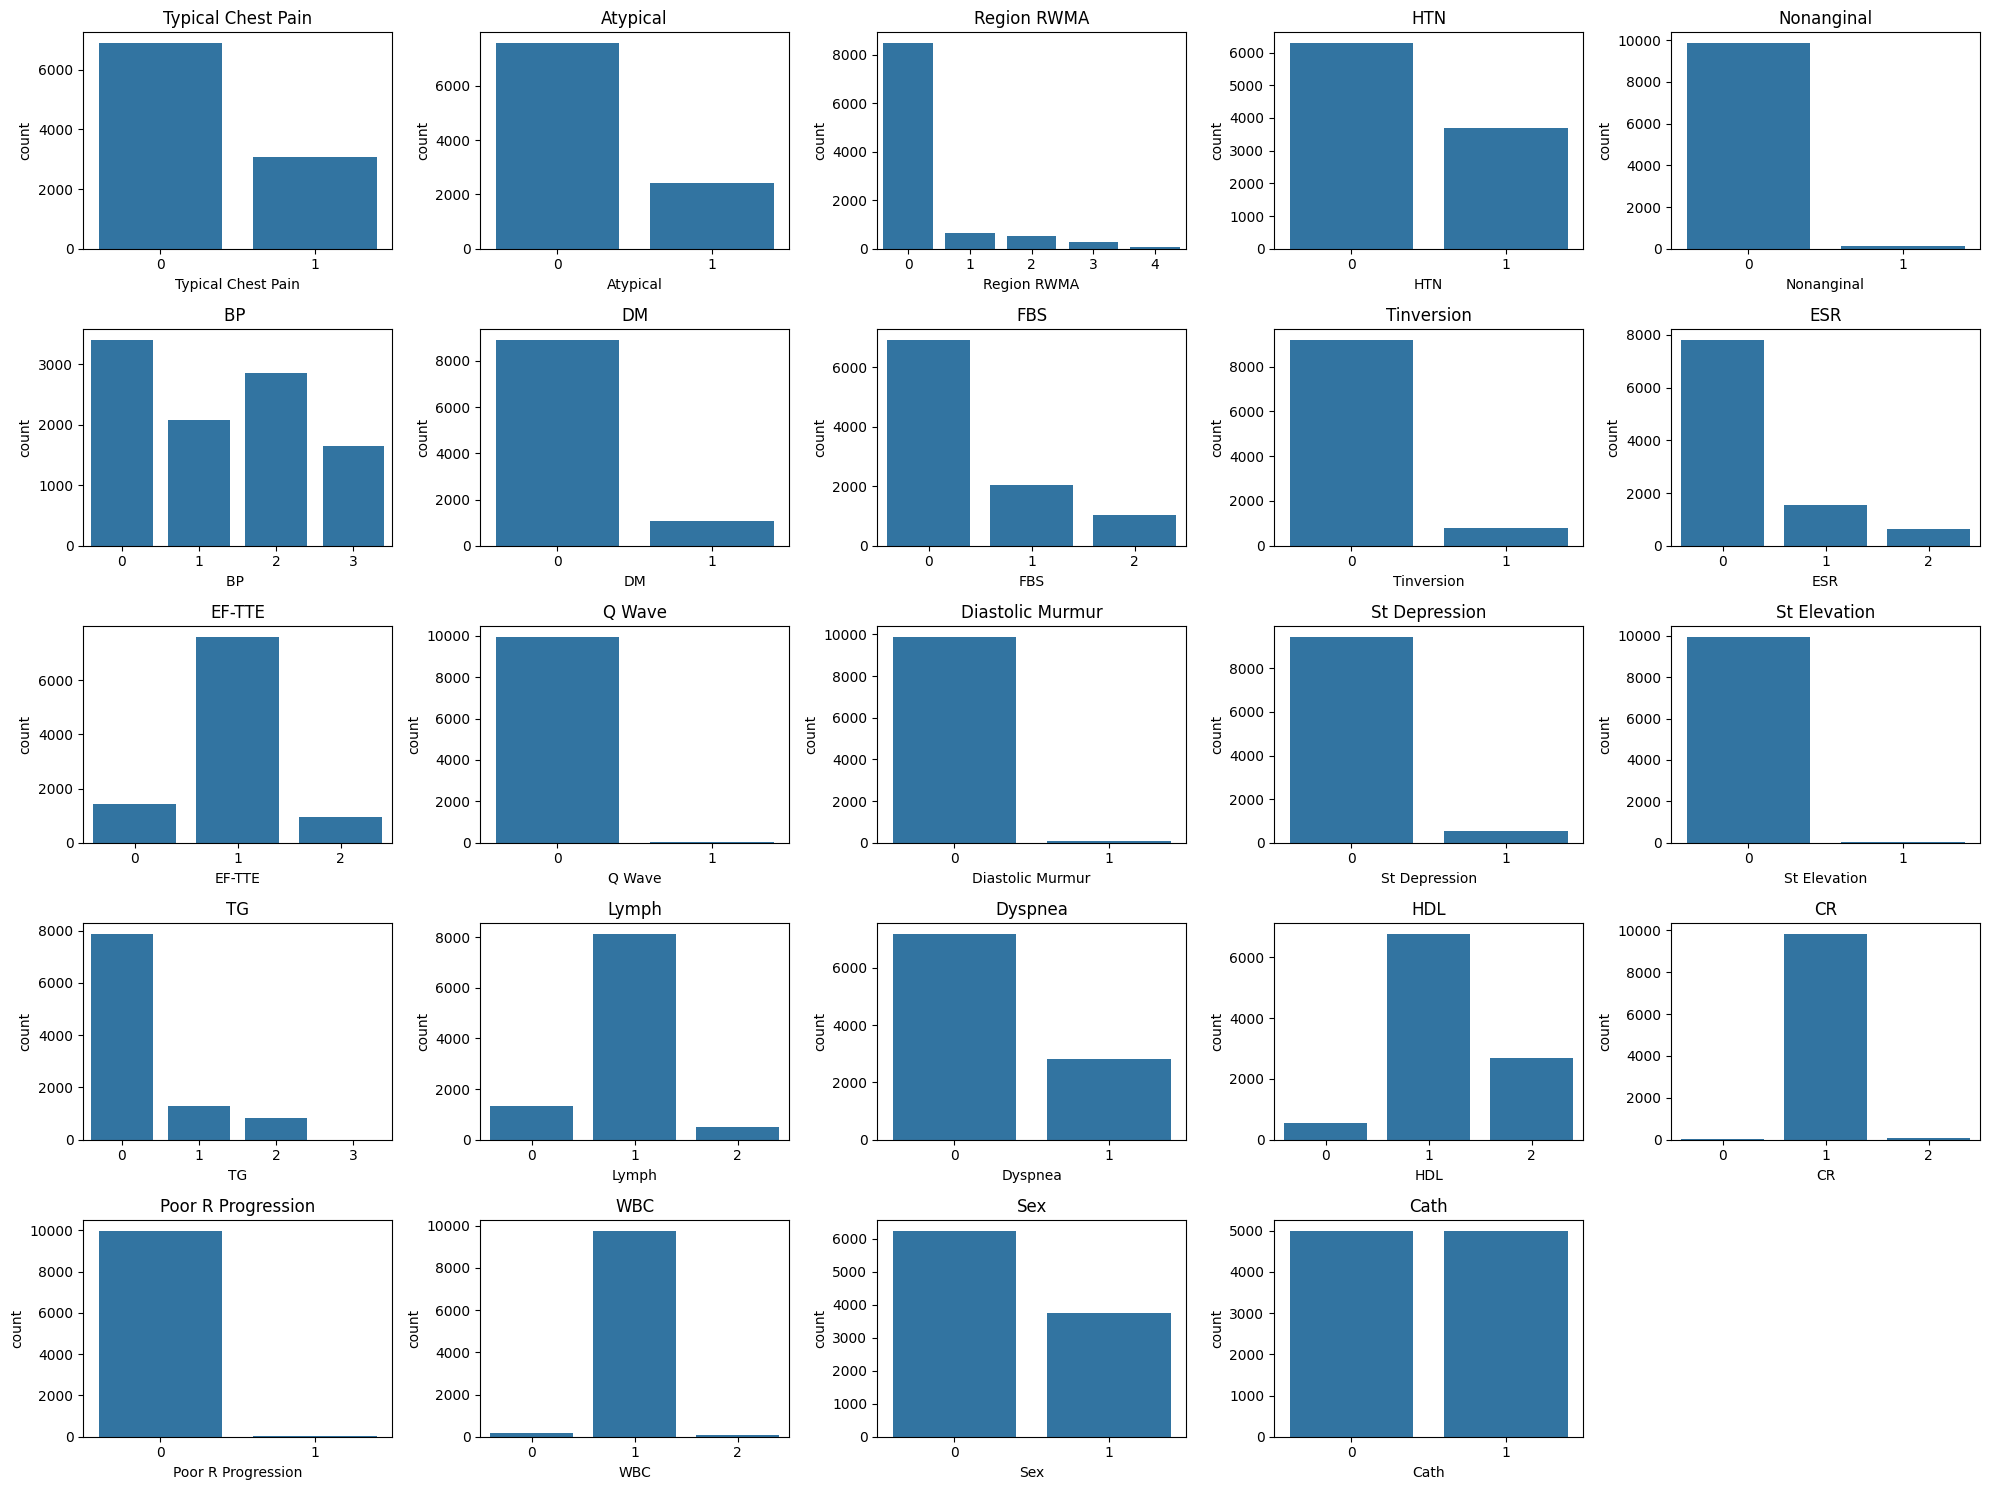

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Drop 'Age' column
data1 = data1.drop(columns=['age'], errors='ignore')

# Set up figure size
plt.figure(figsize=(20, 15))

# Loop through each feature except 'Age'
for i, col in enumerate(data1.columns[:24]):  # Adjust if more than 25 features
    plt.subplot(5, 5, i + 1)  # Create a grid of 5x5 subplots
    if data1[col].dtype == 'object' or data1[col].nunique() < 10:
        sns.countplot(x=data1[col])  # Categorical feature - Count plot
    else:
        sns.histplot(data1[col], kde=True)  # Numerical feature - Histogram with KDE
    plt.title(col)

plt.tight_layout()  # Adjust layout to fit
plt.show()



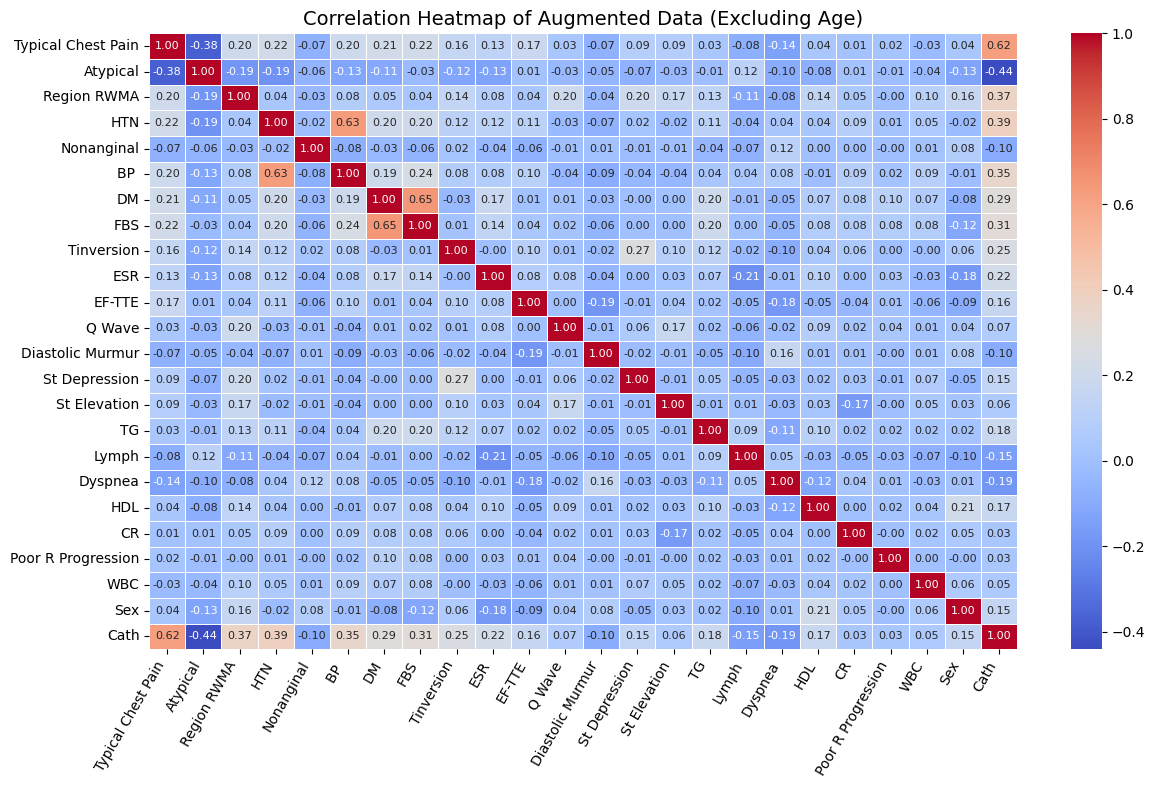

In [ ]:
corr_matrix = data1.corr()

plt.figure(figsize=(14, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})

plt.title("Correlation Heatmap of Augmented Data (Excluding Age)", fontsize=14)
plt.xticks(rotation=60, ha="right", fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

plt.show()

MODEL TRAINNING

In [ ]:
from sklearn.model_selection import train_test_split
X = data1.drop(columns=["Cath"])  # Assuming 'Cath' is the target variable
y = data1["Cath"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost model
model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, verbose=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


0:	learn: 0.6381718	total: 53.5ms	remaining: 26.7s
100:	learn: 0.1175613	total: 571ms	remaining: 2.26s
200:	learn: 0.0856440	total: 1.13s	remaining: 1.69s
300:	learn: 0.0709250	total: 1.48s	remaining: 980ms
400:	learn: 0.0637291	total: 1.98s	remaining: 489ms
499:	learn: 0.0579998	total: 2.67s	remaining: 0us
Test Accuracy: 0.9765


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score , classification_report

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_train)

# Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

XGBoost Model Accuracy: 0.9688


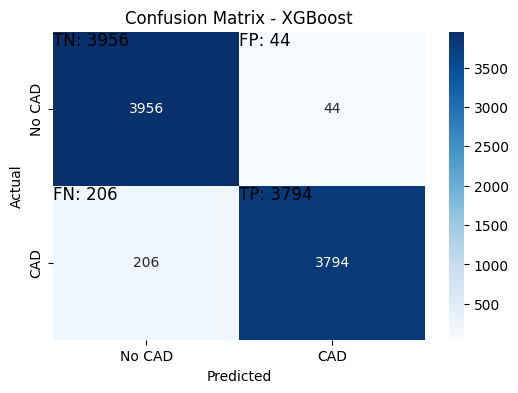

In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix_xgb = confusion_matrix(y_train, y_pred)
TN_xgb, FP_xgb, FN_xgb, TP_xgb = conf_matrix_xgb.ravel()

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No CAD", "CAD"], yticklabels=["No CAD", "CAD"])

# Add TP, TN, FP, FN labels
plt.text(0, 0, f'TN: {TN_xgb}', ha='left', va='top', color='black', fontsize=12)
plt.text(1, 0, f'FP: {FP_xgb}', ha='left', va='top', color='black', fontsize=12)
plt.text(0, 1, f'FN: {FN_xgb}', ha='left', va='top', color='black', fontsize=12)
plt.text(1, 1, f'TP: {TP_xgb}', ha='left', va='top', color='black', fontsize=12)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
import numpy as np
import joblib
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assume X and y are already defined (from 'CAD_augmented.csv')
# Example:
# df = pd.read_csv("CAD_augmented.csv")
# y = df["Cath"]
# X = df.drop(columns=["Cath"])

# Split into base train/test sets first
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Shuffle full training set once
X_train_shuffled, y_train_shuffled = shuffle(X_train_full, y_train_full, random_state=42)

# Divide into 8 chunks of ~1000 each
X_chunks = np.array_split(X_train_shuffled, 8)
y_chunks = np.array_split(y_train_shuffled, 8)

# First 6 chunks used as base (6000 samples)
X_fixed_base = np.concatenate(X_chunks[:6])
y_fixed_base = np.concatenate(y_chunks[:6])

# Remaining 2 chunks used for rotation
rotating_chunks = list(zip(X_chunks[6:], y_chunks[6:]))

best_model = None
best_accuracy = 0

for i, (X_replace, y_replace) in enumerate(rotating_chunks):
    # Combine fixed base with one rotating chunk
    X_train_iter = np.concatenate([X_fixed_base, X_replace])
    y_train_iter = np.concatenate([y_fixed_base, y_replace])

    # Shuffle for randomness
    X_train_iter, y_train_iter = shuffle(X_train_iter, y_train_iter, random_state=42+i)

    print(f"\n🔁 Iteration {i+1}: Training on {X_train_iter.shape[0]} samples")

    # Train the model
    model = XGBClassifier(verbosity=0, use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train_iter, y_train_iter)

    # Evaluate on validation set
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"✅ Validation Accuracy: {acc:.4f}")

    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        joblib.dump(model, f"best_model_iteration_{i+1}.joblib")
        print("💾 Best model so far saved!")

print(f"\n🏆 Highest Validation Accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)



🔁 Iteration 1: Training on 7000 samples
✅ Validation Accuracy: 0.9775
💾 Best model so far saved!

🔁 Iteration 2: Training on 7000 samples
✅ Validation Accuracy: 0.9780
💾 Best model so far saved!

🏆 Highest Validation Accuracy: 0.9780


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import joblib

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/CAD_augmented.csv")
X = df.drop(columns=["Cath"])
y = df["Cath"]

# Train-test split (80% train, 20% validation)
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Shuffle the full 8000-sample training set
X_train_shuffled, y_train_shuffled = shuffle(X_train_full, y_train_full, random_state=42)

# Split into 8 chunks of 1000
X_chunks = np.array_split(X_train_shuffled, 8)
y_chunks = np.array_split(y_train_shuffled, 8)

best_accuracy = 0
best_model = None

# Rotate through all chunks, excluding one each time
for i in range(8):
    # Exclude chunk i
    X_train_iter = pd.concat([X_chunks[j] for j in range(8) if j != i])
    y_train_iter = pd.concat([y_chunks[j] for j in range(8) if j != i])

    # Shuffle again (optional)
    X_train_iter, y_train_iter = shuffle(X_train_iter, y_train_iter, random_state=42+i)

    print(f"Iteration {i+1}: Training on 7000 samples, excluded chunk {i+1}")

    # Train model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
    model.fit(X_train_iter, y_train_iter)

    # Evaluate
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"Validation Accuracy: {acc:.4f}")

    # Save best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        joblib.dump(model, f"best_model_iteration_{i+1}.joblib")
        print(f"✅ New best model saved from iteration {i+1}")

print(f"\nBest Validation Accuracy: {best_accuracy:.4f}")


Iteration 1: Training on 7000 samples, excluded chunk 1


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Validation Accuracy: 0.9940
✅ New best model saved from iteration 1
Iteration 2: Training on 7000 samples, excluded chunk 2
Validation Accuracy: 0.9955
✅ New best model saved from iteration 2
Iteration 3: Training on 7000 samples, excluded chunk 3
Validation Accuracy: 0.9945
Iteration 4: Training on 7000 samples, excluded chunk 4
Validation Accuracy: 0.9945
Iteration 5: Training on 7000 samples, excluded chunk 5
Validation Accuracy: 0.9945
Iteration 6: Training on 7000 samples, excluded chunk 6
Validation Accuracy: 0.9955
Iteration 7: Training on 7000 samples, excluded chunk 7
Validation Accuracy: 0.9945
Iteration 8: Training on 7000 samples, excluded chunk 8
Validation Accuracy: 0.9935

Best Validation Accuracy: 0.9955


🔁 Running 6 iterations with 1000-sample swaps:



/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


✅ Iteration 1: Accuracy = 0.9750
✅ Iteration 2: Accuracy = 0.9765
✅ Iteration 3: Accuracy = 0.9725
✅ Iteration 4: Accuracy = 0.9760
✅ Iteration 5: Accuracy = 0.9760
✅ Iteration 6: Accuracy = 0.9740


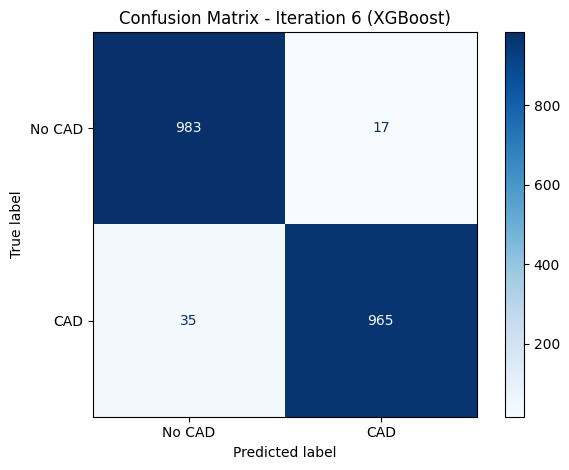

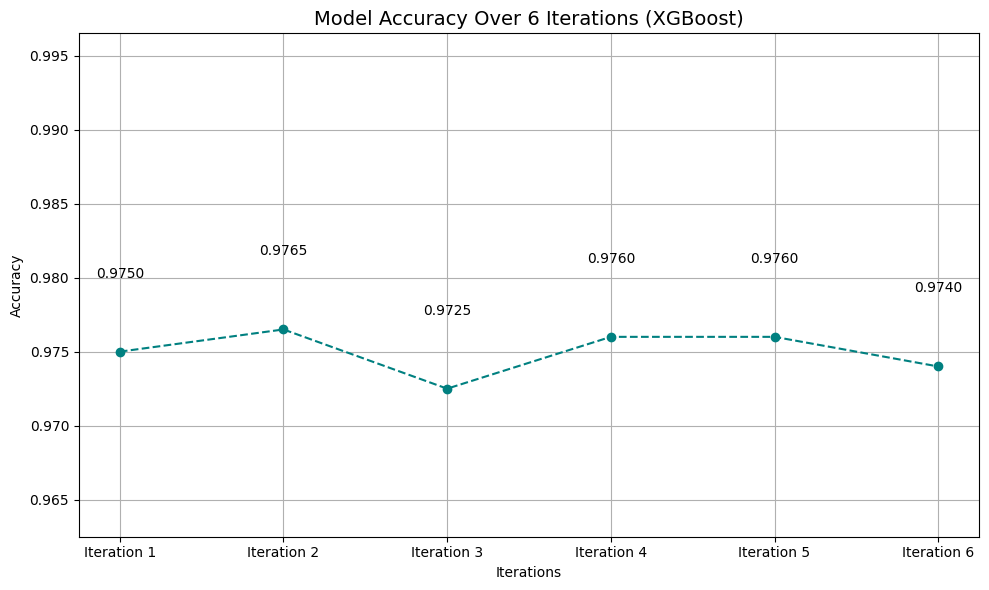

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import numpy as np

# Shuffle training data
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Split into 8 chunks of 1000 each
X_chunks = np.array_split(X_train_shuffled, 8)
y_chunks = np.array_split(y_train_shuffled, 8)

accuracies = []

print("🔁 Running 6 iterations with 1000-sample swaps:\n")
for i in range(6):
    # Swap out chunk i, bring in chunk 6
    X_temp_base = np.concatenate([chunk for j, chunk in enumerate(X_chunks[:6]) if j != i])
    y_temp_base = np.concatenate([chunk for j, chunk in enumerate(y_chunks[:6]) if j != i])

    X_replace = X_chunks[6]
    y_replace = y_chunks[6]

    X_train_iter = np.concatenate([X_temp_base, X_replace])
    y_train_iter = np.concatenate([y_temp_base, y_replace])
    X_train_iter, y_train_iter = shuffle(X_train_iter, y_train_iter, random_state=42 + i)

    # Train XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)
    model.fit(X_train_iter, y_train_iter)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"✅ Iteration {i+1}: Accuracy = {acc:.4f}")

    # Show confusion matrix for the last iteration
    if i == 5:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No CAD', 'CAD'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - Iteration {i+1} (XGBoost)')
        plt.tight_layout()
        plt.show()

# Plotting accuracy trend
plt.figure(figsize=(10, 6))
x_labels = [f"Iteration {i+1}" for i in range(6)]
plt.plot(x_labels, accuracies, marker='o', linestyle='--', color='teal')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=10)

plt.title("Model Accuracy Over 6 Iterations (XGBoost)", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


🔁 Running 6 iterations using Logistic Regression:



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


✅ Iteration 1: Accuracy = 0.9180
✅ Iteration 2: Accuracy = 0.9200
✅ Iteration 3: Accuracy = 0.9195
✅ Iteration 4: Accuracy = 0.9165


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


✅ Iteration 5: Accuracy = 0.9175
✅ Iteration 6: Accuracy = 0.9210


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


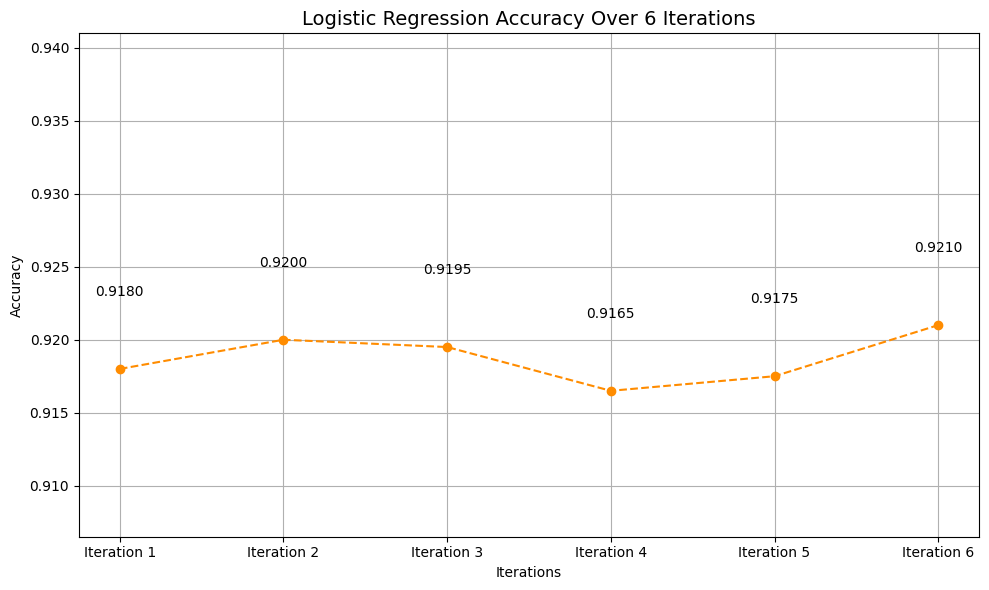

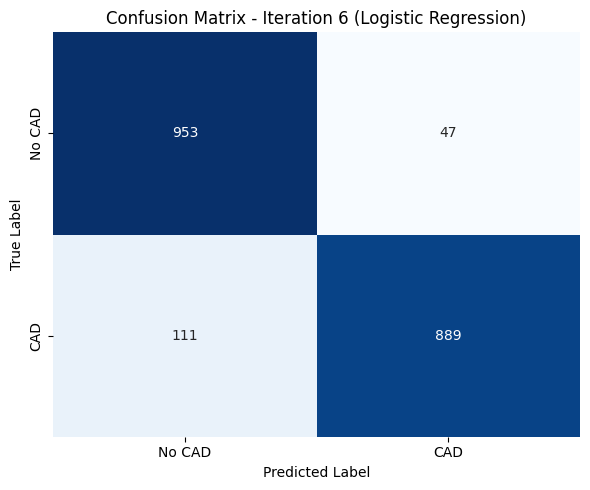

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
import numpy as np

# Shuffle full training set
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Split into 8 chunks of 1000
X_chunks = np.array_split(X_train_shuffled, 8)
y_chunks = np.array_split(y_train_shuffled, 8)

accuracies = []
y_pred_last = None  # to store last prediction
y_test_last = y_test  # store test labels

print("🔁 Running 6 iterations using Logistic Regression:\n")
for i in range(6):
    # Exclude one 1000-sample chunk and replace with chunk[6]
    X_base = np.concatenate([chunk for j, chunk in enumerate(X_chunks[:6]) if j != i])
    y_base = np.concatenate([chunk for j, chunk in enumerate(y_chunks[:6]) if j != i])

    X_replace = X_chunks[6]
    y_replace = y_chunks[6]

    X_iter = np.concatenate([X_base, X_replace])
    y_iter = np.concatenate([y_base, y_replace])
    X_iter, y_iter = shuffle(X_iter, y_iter, random_state=42 + i)

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_iter, y_iter)

    # Evaluate on test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"✅ Iteration {i+1}: Accuracy = {acc:.4f}")

    # Save predictions from the last iteration
    if i == 5:
        y_pred_last = y_pred

# Plot Accuracy Line Graph
plt.figure(figsize=(10, 6))
x_labels = [f"Iteration {i+1}" for i in range(6)]
plt.plot(x_labels, accuracies, marker='o', linestyle='--', color='darkorange')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=10)

plt.title("Logistic Regression Accuracy Over 6 Iterations", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Confusion Matrix for Last Iteration
cm = confusion_matrix(y_test_last, y_pred_last)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CAD', 'CAD'], yticklabels=['No CAD', 'CAD'])
plt.title("Confusion Matrix - Iteration 6 (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


🔁 Running 6 iterations with 1000-sample swaps (LightGBM):

[LightGBM] [Info] Number of positive: 3003, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500500 -> initscore=0.002000
[LightGBM] [Info] Start training from score 0.002000
✅ Iteration 1: Accuracy = 0.9715
[LightGBM] [Info] Number of positive: 2979, number of negative: 3021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of da

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Iteration 2: Accuracy = 0.9725
[LightGBM] [Info] Number of positive: 2989, number of negative: 3011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498167 -> initscore=-0.007333
[LightGBM] [Info] Start training from score -0.007333


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Iteration 3: Accuracy = 0.9725
[LightGBM] [Info] Number of positive: 2968, number of negative: 3032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494667 -> initscore=-0.021334
[LightGBM] [Info] Start training from score -0.021334


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Iteration 4: Accuracy = 0.9740
[LightGBM] [Info] Number of positive: 2957, number of negative: 3043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492833 -> initscore=-0.028669
[LightGBM] [Info] Start training from score -0.028669


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Iteration 5: Accuracy = 0.9725
[LightGBM] [Info] Number of positive: 3015, number of negative: 2985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ Iteration 6: Accuracy = 0.9685


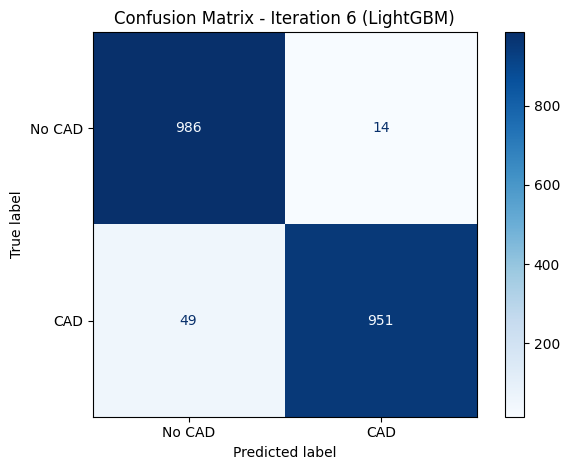

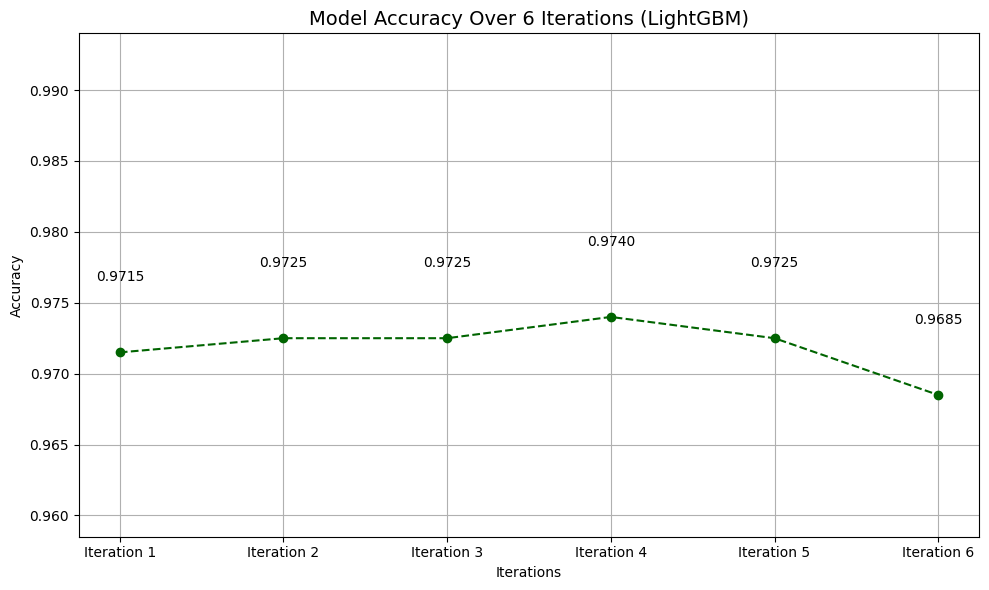

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
import numpy as np

# Shuffle training data
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=42)

# Split into 8 chunks of 1000 each (8 * 1000 = 8000)
X_chunks = np.array_split(X_train_shuffled, 8)
y_chunks = np.array_split(y_train_shuffled, 8)

accuracies = []

print("🔁 Running 6 iterations with 1000-sample swaps (LightGBM):\n")
for i in range(6):
    # Exclude chunk i, include chunk 6
    X_temp_base = np.concatenate([chunk for j, chunk in enumerate(X_chunks[:6]) if j != i])
    y_temp_base = np.concatenate([chunk for j, chunk in enumerate(y_chunks[:6]) if j != i])

    X_replace = X_chunks[6]
    y_replace = y_chunks[6]

    X_train_iter = np.concatenate([X_temp_base, X_replace])
    y_train_iter = np.concatenate([y_temp_base, y_replace])
    X_train_iter, y_train_iter = shuffle(X_train_iter, y_train_iter, random_state=42 + i)

    # Train LightGBM model
    model = lgb.LGBMClassifier()
    model.fit(X_train_iter, y_train_iter)

    # Prediction and accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"✅ Iteration {i+1}: Accuracy = {acc:.4f}")

    # Confusion matrix on last iteration
    if i == 5:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No CAD', 'CAD'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - Iteration {i+1} (LightGBM)')
        plt.tight_layout()
        plt.show()

# Plot accuracy per iteration
plt.figure(figsize=(10, 6))
x_labels = [f"Iteration {i+1}" for i in range(6)]
plt.plot(x_labels, accuracies, marker='o', linestyle='--', color='darkgreen')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=10)

plt.title("Model Accuracy Over 6 Iterations (LightGBM)", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.02)
plt.grid(True)
plt.tight_layout()
plt.show()


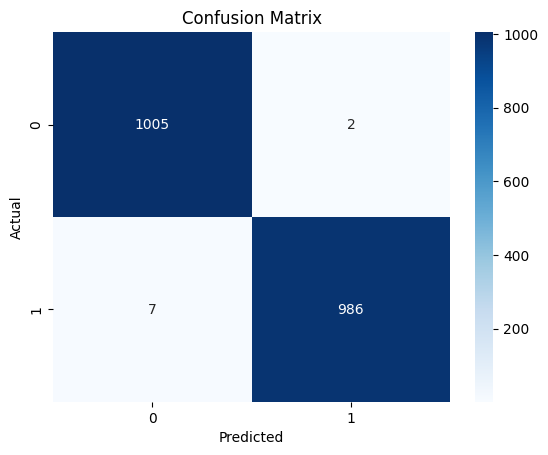


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1007
           1       1.00      0.99      1.00       993

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# After best model prediction
y_pred = best_model.predict(X_val)

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred))



In [ ]:
#  Test a specific patient from the test set
index = 9  # Change this index to test different patients
new_patient = X_test.iloc[95].values.reshape(1, -1)
true_label = y_test.iloc[95]
predicted_label = model.predict(new_patient)[0]

#  Display the prediction results
print(f" Prediction for Test Row ")
print(f" Predicted CAD Status: {'CAD' if predicted_label == 1 else 'No CAD'}")
print(f" Actual CAD Status   : {'CAD' if true_label == 1 else 'No CAD'}")


 Prediction for Test Row 
 Predicted CAD Status: No CAD
 Actual CAD Status   : No CAD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
